# 2 Data Wrangling<a id='2_Data_wrangling'></a>

## 2.1 Contents<a id='2.1_Contents'></a>
* [2 Data wrangling](#2_Data_wrangling)
  * [2.1 Contents](#2.1_Contents)
  * [2.2 Introduction](#2.2_Introduction)
    * [2.2.1 Recap Of Data Science Problem](#2.2.1_Recap_Of_Data_Science_Problem)
    * [2.2.2 Objective of Data Wrangling](#2.2.2_Objective_of_Data_Wrangling)
  * [2.3 Imports](#2.3_Imports)
  * [2.4 Load The Data](#2.4_Load_The_Data)
  * [2.5 Explore The Data](#2.5_Explore_The_Data)
    * [2.5.1 Find Duplicates](#2.5.1_Find_Duplicates)
    * [2.5.2 Find Missing Values](#2.5.2_Find_Missing_Values)
    * [2.5.3 Find Dimensions for Time Series](#2.5.3_Find_Dimensions_for_Time_Series)
      * [2.5.3.1 Total Number of Time Series](#2.5.3.1_Total_Number_of_Time_Series)
      * [2.5.3.2 Time Span of Time Series](#2.5.3.2_Time_Span_of_Time_Series)
        * [2.5.3.2.1 Time Span of Time Series in Weekly_sales Dataframe](#2.5.3.2.1_Time_Span_of_Time_Series_in_Weekly_sales_Dataframe)
        * [2.5.3.2.2 Time Span of Time Series in Features Dataframe](#2.5.3.2.2_Time_Span_of_Time_Series_in_Features _Dataframe)
    * [2.5.4 Time Trend of Weekly Sales](#2.5.4_Time_Trend_of_Weekly_Sales)
      * [2.5.4.1 Time Trend of Weekly Sales for Dept](#2.5.4.1_Time_Trend_of_Weekly_Sales_for_Dept)
      * [2.5.4.2 Time Gap of Weekly Sales](#2.5.4.2_Time_Gap_of_Weekly_Sales)
    * [2.5.5 Categorical Features](#2.5.5_Categorical_Features)
      * [2.5.5.1 Store Type](#2.5.5.1_Store_Type)
        * [2.5.5.1.1 Store Size for Different Store Type](#2.5.5.1.1_Store_Size_for_Different_Store_Type)
        * [2.5.5.1.2 Weekly Sales for Different Store Type](#2.5.5.1.2_Weekly_Sales_for_Different_Store_Type)
      * [2.5.5.2 Holiday Effect](#2.5.5.2_Holiday_Effect)
    * [2.5.6 Numerical Features](#2.5.6_Numerical_Features)
      * [2.5.6.1 Numerical Variables in features df](#2.5.6.1_Numerical_Variables_in_Features_df)
        * [2.5.6.1.1 Numerical Variables Summary](#2.5.6.1.1_Numerical_Variables_Summary)
        * [2.5.6.1.2 Numerical Variables Distribution](#2.5.6.1.2_Numerical_Variables_Distribution)
      * [2.5.6.2 Numerical Variables in weekly_sales_type df](#2.5.6.2_Numerical_Variables_in_Weekly_Sales_Type_df)
  * [2.6 Merge The Data](#2.6_Merge_The_Data)
  * [2.7 Save The dData](#2.7_Save_The_data)
  * [2.8 Summary](#2.8_Summary)


## 2.2 Introduction<a id='2.2_Introduction'></a>

This step focuses on collecting the data, organizing it, and making sure it's well defined. Some data cleaning will be done at this stage.

### 2.2.1 Recap Of Data Science Problem<a id='2.2.1_Recap_Of_Data_Science_Problem'></a>

The purpose of this data science project is to predict sales next three months for different Walmart stores and departments based on two past year sales history. This project aims to build predictive models for multiple time series for each store/dept. Such models will be used to provide guidance for the management team at Walmart to properly manage the inventory and allocate their resources, react to a market change, this may help prevent unnecessary money loss. The model can also be used to set sales target for sales department

### 2.2.2 Objective of Data Wrangling<a id='2.2.2_Objective_of_Data_Wrangling'></a>

In this part of notebook, I ll try to address:
1) Import all the data into a Jupyter Notebook
   -identify target features
   
   -identify potential features 

2) Determine the dimensions associated with the project, number of stores, departments and total number of time series
For instance: region, sub-region, state, city, store, department, product

3) Identify weekly_sales trend based on the date_time, find the datetime range 

4) Split features into two categories: categorical features and numerical features
   For categorical features, explore their correlation with the target feature-"weekly_sales" 
   For numerical features, check if there are any NAs and outliers, replace with reasonal data

5) save cleaned df 


## 2.3 Imports<a id='2.3_Imports'></a>

In [1]:
#import libs  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import os
from collections import Counter
from datetime import datetime
import math

## 2.4 Load The Data <a id='2.4_Load_The_Data'></a>

In [2]:
stores = pd.read_csv(r'C:/New folder/capstone 2/data/stores.csv')

In [3]:
features=pd.read_csv(r'C:/New folder/capstone 2/data/features.csv')

In [4]:
Weekly_sales=pd.read_csv(r'C:/New folder/capstone 2/data/train.csv')

There are total three excel files related to this project: stores, features, train

In [5]:
#call info() to check summary of each data frame
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


Store contains store #, store size and type, not time series 

In [6]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [7]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


features are multiple weekly time series data. It contains local information(CPI, unemployment, T and markdown values) which change in weekly for each store

In [8]:
Weekly_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [9]:
Weekly_sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [10]:
Weekly_sales.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False
421569,45,98,2012-10-26,1076.80,False


Weekly_sales are complex time series data. It contains the target features-weekly sales-for each store/dept, it also contains information about holiday or non-holiday 

There are three datasets: 

Store is the simplest df, which contains store size and type for each store, no time series involved. 

features df contains local information(CPI, unemployment, T and markdown values) change in weekly basis for each store, no dept information is included. 

weekly sales df is the most complicated df, which contains the target feature- weekly sales for each store and dept on weekly basis. 

all the columns in Store df and features df could be potential features useful for sales prediction:CPI, unemployment, T and markdown, store type,store size.

Since the target -weekly_sales is for every store/dept, need to check missing values/duplicates for each store/dept

## 2.5. Explore The Data<a id='2.5_Explore_The_Data'></a>

### 2.5.1 Find Duplicates<a id='2.5.1_Find_Duplicates'></a>
find duplicates in each dataframe

In [11]:
#find duplicates in stores df
#find number of stores, check if there is any duplicates
stores_count=stores['Store'].value_counts(sort=True)
print(stores_count.head())
#stores_count_dict=stores_count.to_dict
#print(k for k, v in stores_count_dict.items() if v>1)

1     1
24    1
26    1
27    1
28    1
Name: Store, dtype: int64


In [12]:
#find duplicates in weekly_sales df
#Weekly_sales[Weekly_sales.duplicated(subset=['Store','Dept','Date'], keep=False)]

Weekly_sales.duplicated(keep=False).sum()

0

In [13]:
#find duplicates in features df based on selected columns
#features[features.duplicated(subset=['Store','Date'], keep=False)]

features.duplicated(keep=False).sum()

0

no duplicates were found in the three data frame

### 2.5.2 Find Missing Values<a id='2.5.2_Find_Missing_Values'></a>

In [14]:
#confirm no missing values in Weekly_sales df
Weekly_sales.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [15]:
#confirm no missing values in stores df
stores.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [16]:
#find the missing values for each cols in features df
features_missing = pd.concat([features.isnull().sum(), 100 * features.isnull().mean()],axis=1)
features_missing.columns=['count','%']
features_missing

,count,%
Store,0,0.000000
Date,0,0.000000
Temperature,0,0.000000
Fuel_Price,0,0.000000
MarkDown1,4158,50.769231
MarkDown2,5269,64.334554
MarkDown3,4577,55.885226
MarkDown4,4726,57.704518
MarkDown5,4140,50.549451
CPI,585,7.142857


no missing values found in Weekly_sales and Stores df; 

missing values found in "features" df, missing values in markdown columns are about 50% above, missing values in CPI and unemployment cols is about 7%

### 2.5.3 Find Dimensions for Time Series<a id='2.5.3_Find_Dimensions_for_Time_Series'></a>

Since the target feature-"Weekly sales" is in Weekly_sales df, Weekly_sales df should include complete picture of all the time series dimension(1st level dimension-# of stores, 2nd level dimension # of dept), starting and end date for Weekly_sales' records, etc 

#### 2.5.3.1 Total Number of Time Series<a id='2.5.3.1_Total_Number_of_Time_Series'></a>

In [17]:
# stores df does not contain any time series
#feature and weekly_sales df contains time series
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [18]:
#feature df contains store and date information, find the number of stores in features
features.Store.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [19]:
Weekly_sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [20]:
#Weekly_sales df contains store/dept and date information, find the number of stores and dept in df
Weekly_sales.Store.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

Store number from feature df and Weekly_sales df matches

In [21]:
#count # of Dept for each store, this information can be found in Weekly_sales df
#https://stackoverflow.com/questions/38309729/count-unique-values-per-groups-with-pandas
Dept_num=Weekly_sales.groupby('Store').Dept.nunique()
Dept_num.head()

Store
1    77
2    78
3    72
4    78
5    72
Name: Dept, dtype: int64

In [22]:
#total # of time series are sum of dept numbers in each store 
Total_number=Dept_num.sum()
Total_number

3331

Total number of time series are 3331, each store/dept is considered as one time series, total number is sum of depts in all the stores

#### 2.5.3.2 Time Span of Time Series<a id='2.5.3.2_Time_Span_of_Time_Series'></a>

In [23]:
##### 2.5.3.2.1 Time Span of Time Series in Weekly_sales Dataframe<a id='2.5.3.2.1_Time_Span_of_Time_Series in Weekly_sales Dataframe'></a>

In [24]:
#Convert string of date in dfs to datetime format
Weekly_sales.Date=pd.to_datetime(Weekly_sales.Date)
features.Date=pd.to_datetime(features.Date)

In [25]:
#check datatype in date cols
Weekly_sales.Date.dtypes
features.Date.dtypes

dtype('<M8[ns]')

In [26]:
#set date col as index for weekly_sales
Weekly_sales.set_index("Date",inplace=True)
Weekly_sales.head()

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,1,1,24924.50,False
2010-02-12,1,1,46039.49,True
2010-02-19,1,1,41595.55,False
2010-02-26,1,1,19403.54,False
2010-03-05,1,1,21827.90,False


In [27]:
#starting point for weekly sales
min(Weekly_sales.index)

Timestamp('2010-02-05 00:00:00')

In [28]:
#end point for weekly sales
max(Weekly_sales.index)

Timestamp('2012-10-26 00:00:00')

In [29]:
#find total number of weeks for weekly_sales record
Num_of_weeks=(max(Weekly_sales.index)-min(Weekly_sales.index))/7
Num_of_weeks

Timedelta('142 days 00:00:00')

##### 2.5.3.2.2 Time Span of Time Series in Features Dataframe<a id='2.5.3.2.2_Time_Span_of_Time_Series in Features Dataframe'></a>

In [30]:
# Set 'Date' col as index col in features df
features.set_index("Date",inplace=True)
features.head()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
Date,,,,,,,,,,,
2010-02-05,1,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2010-02-12,1,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2010-02-19,1,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
2010-02-26,1,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
2010-03-05,1,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [31]:
#starting point for features
min(features.index)

Timestamp('2010-02-05 00:00:00')

In [32]:
#end point for features
max(features.index)

Timestamp('2013-07-26 00:00:00')

In [33]:
(max(features.index)-min(features.index))/7

Timedelta('181 days 00:00:00')

In [34]:
#check if there is time gap in features df
#find # of weekly records for each store
features_group=features.groupby(['Store']).size().to_frame()

features_group.reset_index(inplace=True)
features_group.rename(columns={0:'counts'},inplace=True)
#sort the rows based on number of records for weekly_sales
#features_group.sort_values(by=['counts'], ascending=False, inplace=True) since all the store have same counts, no need to order the counts
features_group.head()


,Store,counts
0,1,182
1,2,182
2,3,182
3,4,182
4,5,182


Total number of time series of Weekly sales are 3331. 
Range of datetime is from Feb.05,2010 to Oct. 26,2012; total number of weeks is 143.

Time range in features df is longer than weekly sales, from Feb.05,2010 to Jul. 26,2013.
Since weekly sales are the target feature, so data in features df after Oct.26, 2012 will be dropped. 

### 2.5.4 Time Trend of Weekly Sales <a id='2.5.4_Time_Trend_of_Weekly_Sales'></a>

#### 2.5.4.1 Time Trend of Weekly Sales for Dept<a id='2.5.4.1_Time_Trend_of_Weekly_Sales_for_Dept'></a>

C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000028CA06CC640> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000028CA1171070> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000028CA11FCA30> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle 

C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000028CA132DEB0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000028CA133B940> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000028CA134A340> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle 

C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000028CA148F1C0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000028CA148FDC0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000028CA149F7C0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle 

C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000028CA1571700> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000028CA1571DC0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000028CA15651C0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle 

C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000028CA15E4EE0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000028CA19DC2B0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000028CA19D6910> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle 

C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000028CA1AA2580> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000028CA1AC3DF0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000028CA1AD4A60> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle 

C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000028CA1BEFB50> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000028CA1C036A0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000028CA1C03220> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle 

C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000028CA06245B0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000028CA1CC84C0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000028CA1B67D90> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle 

C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000028CA1C10490> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000028CA1D058E0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000028CA1D05D90> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle 

C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000028CA2EA5070> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000028CA2EA55E0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000028CA1EC3970> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle 

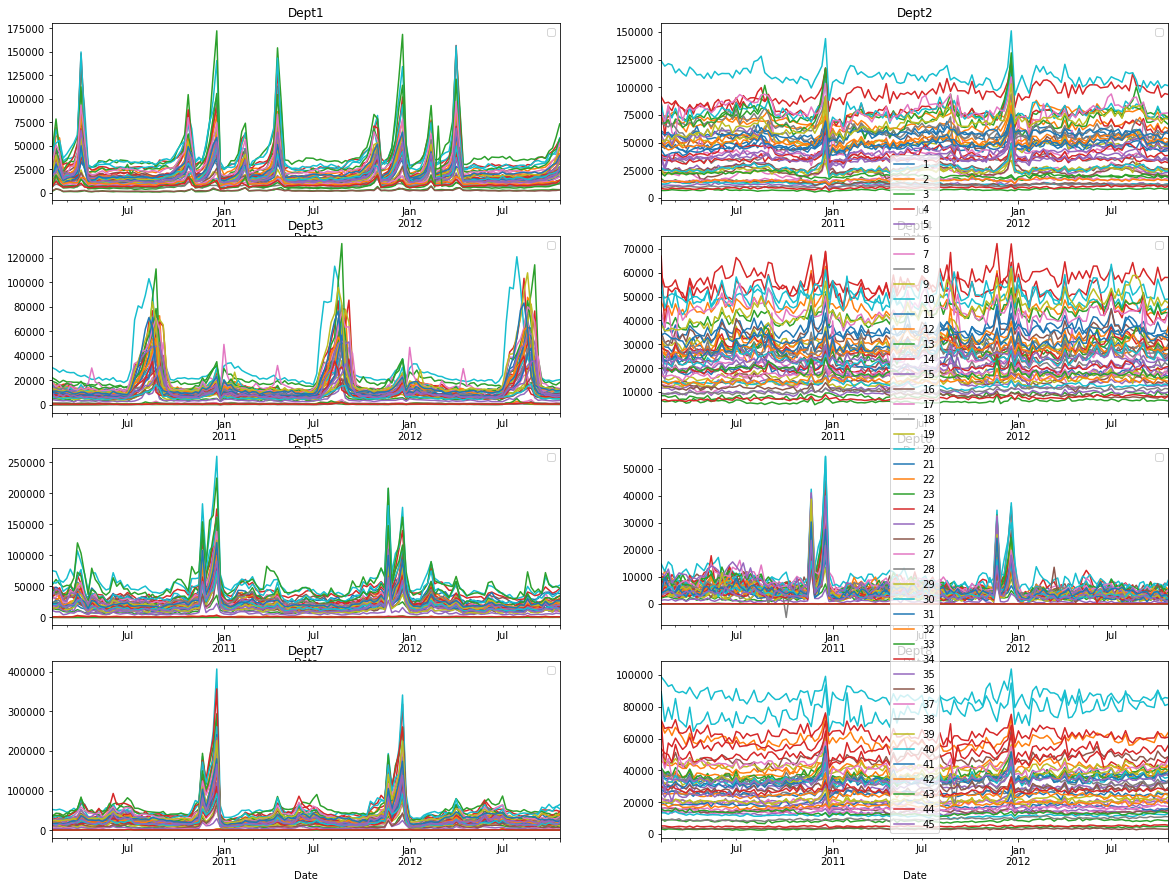

In [35]:
# find list of departments in 45 stores 
dept_list=Weekly_sales.Dept.unique().tolist()

len(dept_list) 
#total number of dept is 81, to show the weekly sales trend for each dept, 81 plots are needed. 
#In order to simplify the outputs, only first 8 departments are seleted to show 
n=8
fig, axes = plt.subplots(nrows=int(n/2), ncols=2,figsize=(20,15))
#with sns.plotting_context("notebook", font_scale=1.5):
for i in dept_list[:n]:
    dept_group=Weekly_sales[Weekly_sales['Dept']==i].groupby('Store')
   
    for key in dept_group.groups.keys(): 
        index=dept_list.index(i)
        if index<n-1:
            dept_group.get_group(key).plot(y='Weekly_Sales',use_index=True, ax=axes.flat[index],label = '_nolegend_', title='Dept'+str(index+1))
        else:
            dept_group.get_group(key).plot(y='Weekly_Sales',use_index=True, ax=axes.flat[index],label=key, title='Dept'+str(index+1))
            

#share legend for all the plots
#lines, labels = fig.axes[-1].get_legend_handles_labels()
#fig.legend(lines, labels, loc = 'upper center')


C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000028CA35A53D0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000028CA3616DC0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000028CA34D2250> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle 

C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000028CA381A610> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000028CA37F21F0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000028CA37F2D30> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle 

C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000028CA38E0430> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000028CA38A74C0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000028CA38B7970> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle 

C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000028CA31F5040> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000028CA397A0A0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000028CA3A30E80> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle 

C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000028CA3B0D940> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000028CA3B0D340> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000028CA3B1D7F0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle 

C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000028CA1D2BB80> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000028CA1E03B20> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000028CA36642E0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle 

C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000028CA0B3ECD0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000028CA3145A60> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000028CA05AD0A0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle 

C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000028CA14FAAF0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000028CA14FAA60> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000028CA0B31E20> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle 

C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000028CA3095670> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000028CA37F2160> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000028CA3155100> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle 

C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000028CA0B6F280> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000028CA135C2B0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000028CA135CA90> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
C:\Users\ygao10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle 

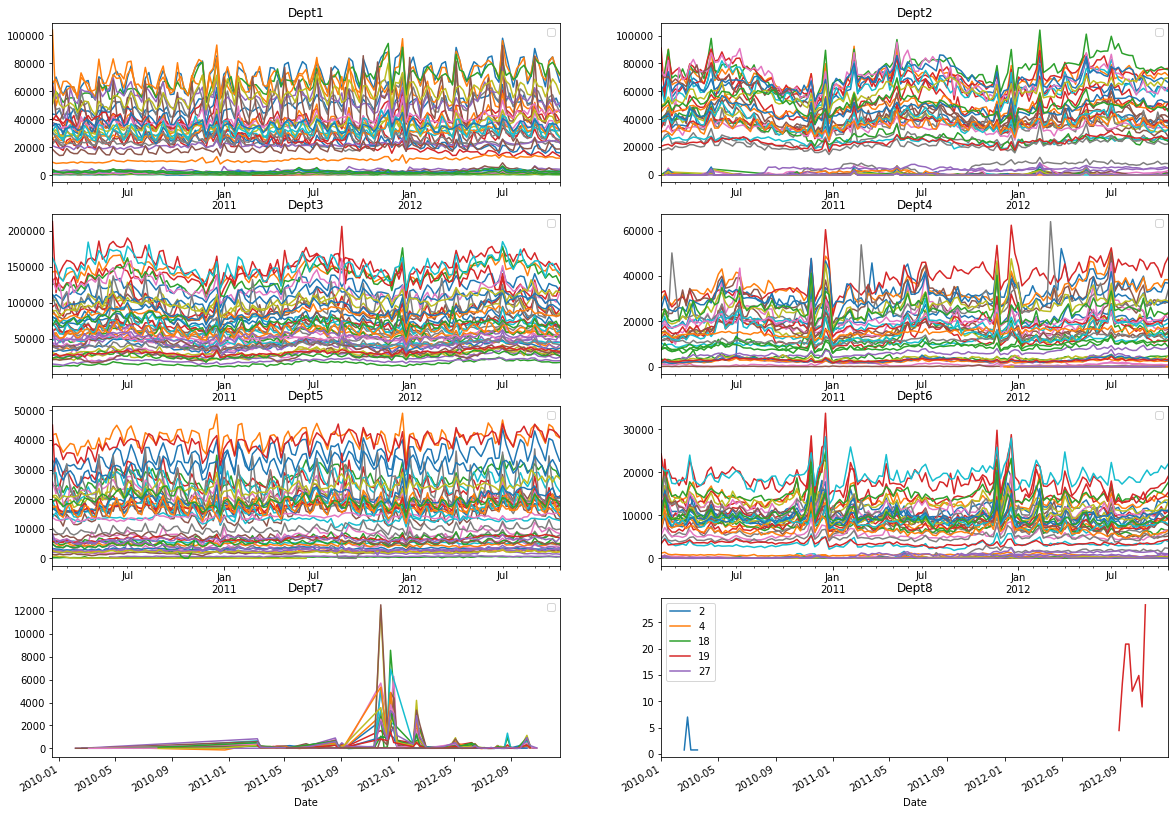

In [36]:
#last 8 departs are shown
fig, axes = plt.subplots(nrows=int(n/2), ncols=2,figsize=(20,15))
for i in dept_list[70:70+n]:
    dept_group=Weekly_sales[Weekly_sales['Dept']==i].groupby('Store')
   
    for key in dept_group.groups.keys(): 
        index=dept_list.index(i)-70
        if index<n-1:
            dept_group.get_group(key).plot(y='Weekly_Sales',use_index=True, ax=axes.flat[index],label = '_nolegend_', title='Dept'+str(index+1))
        else:
            dept_group.get_group(key).plot(y='Weekly_Sales',use_index=True, ax=axes.flat[index],label=key, title='Dept'+str(index+1))
   
   

Majority of the depts show seasonality: 

Some show high sales at holiday seasons(Nov, Dec), some show high sales at other seasons(July).

For some depts, weekly sales at different stores are comparable; for other depts, sales at different store vary significantly

Very few depts have large time gap in the weekly sales records, and the trend is not clear

#### 2.5.4.2 Time Gap of Weekly Sales <a id='2.5.4.2_Time_Gap_of_Weekly_Sales'></a>

In [37]:
#find # of weekly_sales records for each store/dept
Weekly_sales_group=Weekly_sales.groupby(['Store','Dept']).size().to_frame()

Weekly_sales_group.reset_index(inplace=True)
Weekly_sales_group.rename(columns={0:'counts'},inplace=True)
#sort the rows based on number of records for weekly_sales
Weekly_sales_group.sort_values(by=['counts'], ascending=False, inplace=True)
#show last few records with lowest record number
Weekly_sales_group.tail(100)


,Store,Dept,counts
3100,42,33,4
1972,26,77,4
3093,42,24,4
1434,19,77,4
802,11,50,4
...,...,...,...
1576,21,50,1
3101,42,34,1
2684,36,36,1
1912,25,96,1


In [38]:
#find sales records less than 4
counts_less_month=(Weekly_sales_group.counts<4).sum()
counts_less_month/Total_number

0.0258180726508556

In [39]:
#find sales records less than 143
counts_less_all=(Weekly_sales_group.counts<143).sum()
counts_less_all/Total_number

0.20144100870609427

2.5% of the Store/Dept has records less than 4 weeks, 20% of Store/Dept does not have full records during 143 weeks

### 2.5.5 Categorical Features <a id='2.5.5_Categorical_Features'></a>

#### 2.5.5.1 Store Type <a id='2.5.5.1_Store_Type'></a>

In [40]:
# work on stores df
#count # of stores for each type
store_type=stores.groupby('Type').count()
store_type.drop(['Store'], axis=1,inplace=True)
store_type.rename(columns={'Size':'counts'},inplace=True)
store_type

,counts
Type,
A,22
B,17
C,6


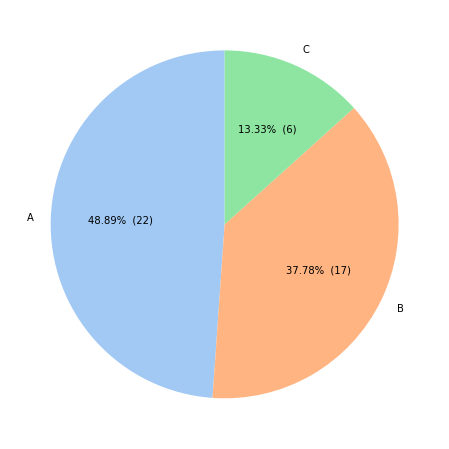

In [41]:
#plot pie chart for store type distribution with defined size
plt.figure(figsize=(10,8))

#define colors, refer to https://www.statology.org/seaborn-pie-chart/
colors = sns.color_palette('pastel')[0:3]  

store_type.reset_index(inplace=True)
label = store_type.Type
data = store_type.counts

#define function to plot both ratio and number for each store type
#https://stackoverflow.com/questions/6170246/how-do-i-use-matplotlib-autopct#:~:text=autopct%20enables%20you%20to%20display,set%20to%20the%20string%20'%25.
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.pie(data,labels=label, colors=colors,startangle = 90, autopct=make_autopct(data))
#plt.title="store type distribution"
plt.show()

#### 2.5.5.1.1 Store Size for Different Store Type <a id='2.5.5.1.1_Store_Size_for_Different_Store_Type'></a>

In [42]:
#group the store df by store type, and calculate the mean size for each type of the store
stores.groupby('Type',as_index=False)['Size'].mean()

,Type,Size
0,A,177247.727273
1,B,101190.705882
2,C,40541.666667


<AxesSubplot:xlabel='Type', ylabel='Size'>

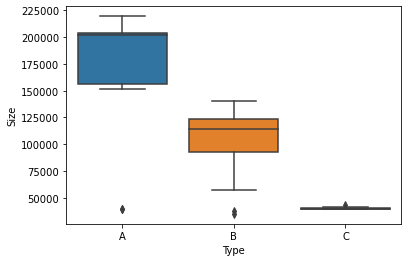

In [43]:
#plot boxplot of store size based on different store type
#sns.violinplot(x="Type", y="Size", data=stores); 
#https://hippocampus-garden.com/pandas_boxplot/

#stores.groupby('Type').boxplot(column='Size')

sns.boxplot(x="Type", y="Size", data=stores)


#### 2.5.5.1.2 Weekly Sales for Different Store Type <a id='2.5.5.1.2_Weekly_Sales_for_Different_Store_Type'></a>

In [44]:
#merge two dfs: weekly_sales and stores on 'store' col, merge based on the rows for weekly_sales
Weekly_sales_type=Weekly_sales.reset_index().merge(stores, how="left", on='Store')
Weekly_sales_type.head()

,Date,Store,Dept,Weekly_Sales,IsHoliday,Type,Size
0,2010-02-05,1,1,24924.50,False,A,151315
1,2010-02-12,1,1,46039.49,True,A,151315
2,2010-02-19,1,1,41595.55,False,A,151315
3,2010-02-26,1,1,19403.54,False,A,151315
4,2010-03-05,1,1,21827.90,False,A,151315


Text(0.5, 0, 'Store')

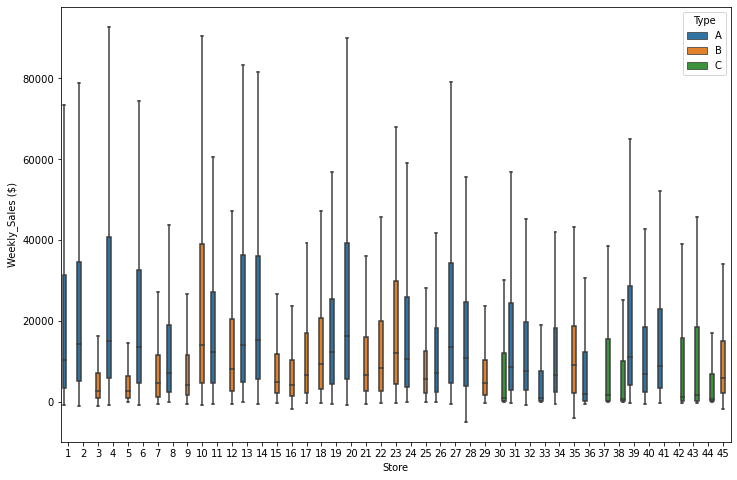

In [45]:
#plot weekly sales distribution for each store, comparing between different store types
plt.subplots(figsize=(12, 8))
sns.boxplot(x='Store', y='Weekly_Sales', hue='Type', showfliers=False, data=Weekly_sales_type)
plt.ylabel('Weekly_Sales ($)')
plt.xlabel('Store')

Text(0.5, 0, 'Store type')

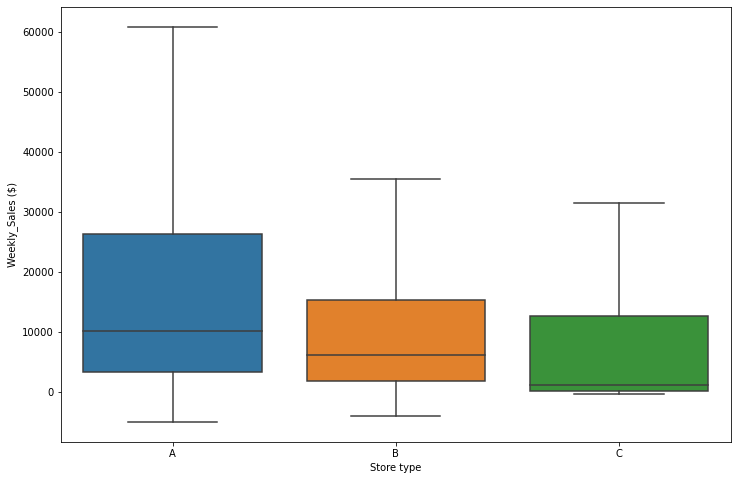

In [46]:
#plot boxplot for weekly_sales based on store type providing sales distribution for different types of the store
plt.subplots(figsize=(12, 8))
sns.boxplot(x='Type', y='Weekly_Sales', showfliers=False, data=Weekly_sales_type)
plt.ylabel('Weekly_Sales ($)')
plt.xlabel('Store type')

Half of the stores are type A and have largest size in average, type C has smallest size in average and least number of stores; Type A tends to have highest average weekly sales value

### 2.5.5.2 Holiday Effect <a id='2.5.5.2_Holiday_Effect'></a>

Text(0.5, 0, 'IsHoliday')

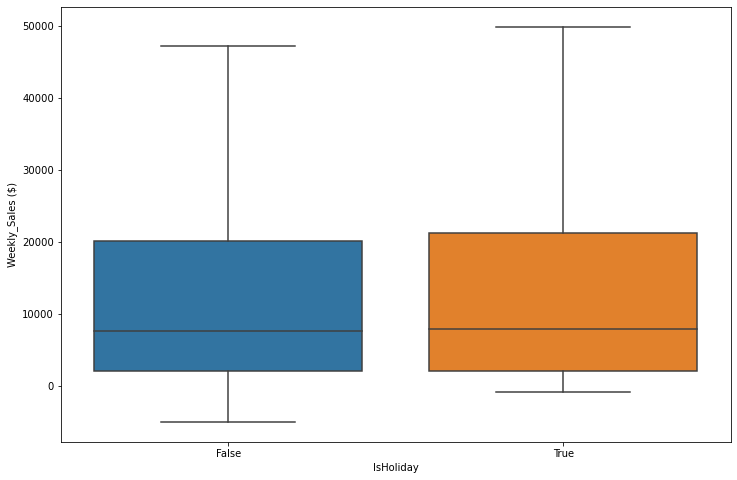

In [47]:
#plot weekly_sales distribution based on holiday
plt.subplots(figsize=(12, 8))
sns.boxplot(x='IsHoliday', y='Weekly_Sales', showfliers=False, data=Weekly_sales_type)
plt.ylabel('Weekly_Sales ($)')
plt.xlabel('IsHoliday')

Text(0.5, 0, 'Store')

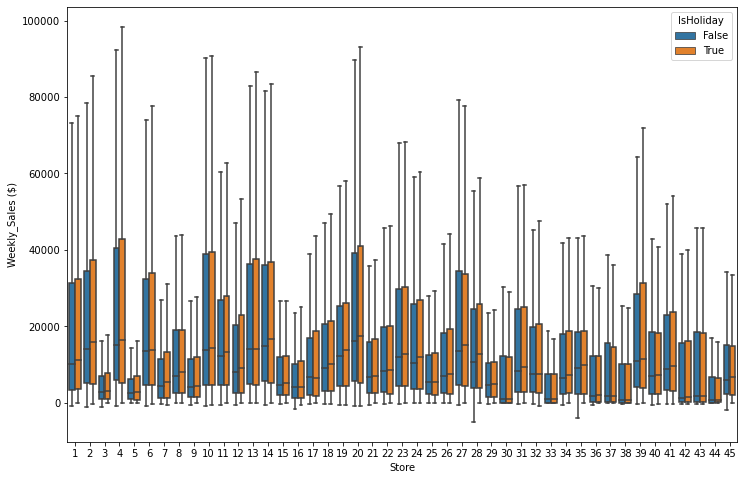

In [48]:
#plot weekly sales distribution for each store, comparing holiday with non-holidays
plt.subplots(figsize=(12, 8))
sns.boxplot(x='Store', y='Weekly_Sales', hue='IsHoliday', showfliers=False, data=Weekly_sales)
plt.ylabel('Weekly_Sales ($)')
plt.xlabel('Store')
#plt.yscale('log')
#plt.ylim(0,30000)

Comparing holidays and nonholidays for weekly sales, the median values overall are similar, max /min sales values are higher on holidays than that on non-holidays; when looking at each store, the holiday weekly sales is alway lightly higher than non-holidays 

## 2.5.6 Numerical Features <a id='2.5.6_Numerical_Features'></a>

#### 2.5.6.1 Numerical Variables in features df <a id='2.5.6.1_Numerical_Variables_in_Features_df'></a>

#### 2.5.6.1.1 Numerical Variables Summary <a id='2.5.6.1.1_Numerical_Variables_Summary></a>

In [49]:
features.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8190 entries, 2010-02-05 to 2013-07-26
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Temperature   8190 non-null   float64
 2   Fuel_Price    8190 non-null   float64
 3   MarkDown1     4032 non-null   float64
 4   MarkDown2     2921 non-null   float64
 5   MarkDown3     3613 non-null   float64
 6   MarkDown4     3464 non-null   float64
 7   MarkDown5     4050 non-null   float64
 8   CPI           7605 non-null   float64
 9   Unemployment  7605 non-null   float64
 10  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1)
memory usage: 711.8 KB


In [50]:
#get basic statistics for features df
features.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,8190.0,23.000000,12.987966,1.000,12.000000,23.000000,34.000000,45.000000
Temperature,8190.0,59.356198,18.678607,-7.290,45.902500,60.710000,73.880000,101.950000
Fuel_Price,8190.0,3.405992,0.431337,2.472,3.041000,3.513000,3.743000,4.468000
MarkDown1,4032.0,7032.371786,9262.747448,-2781.450,1577.532500,4743.580000,8923.310000,103184.980000
MarkDown2,2921.0,3384.176594,8793.583016,-265.760,68.880000,364.570000,2153.350000,104519.540000
MarkDown3,3613.0,1760.100180,11276.462208,-179.260,6.600000,36.260000,163.150000,149483.310000
MarkDown4,3464.0,3292.935886,6792.329861,0.220,304.687500,1176.425000,3310.007500,67474.850000
MarkDown5,4050.0,4132.216422,13086.690278,-185.170,1440.827500,2727.135000,4832.555000,771448.100000
CPI,7605.0,172.460809,39.738346,126.064,132.364839,182.764003,213.932412,228.976456
Unemployment,7605.0,7.826821,1.877259,3.684,6.634000,7.806000,8.567000,14.313000


#### 2.5.6.1.2 Numerical Variables Distribution <a id='2.5.6.1.2_Numerical_Variables_Distribution></a>

In [51]:
#select feature numerical cols without store/datetime cols
features_numerical=features.select_dtypes(include=['float64'])

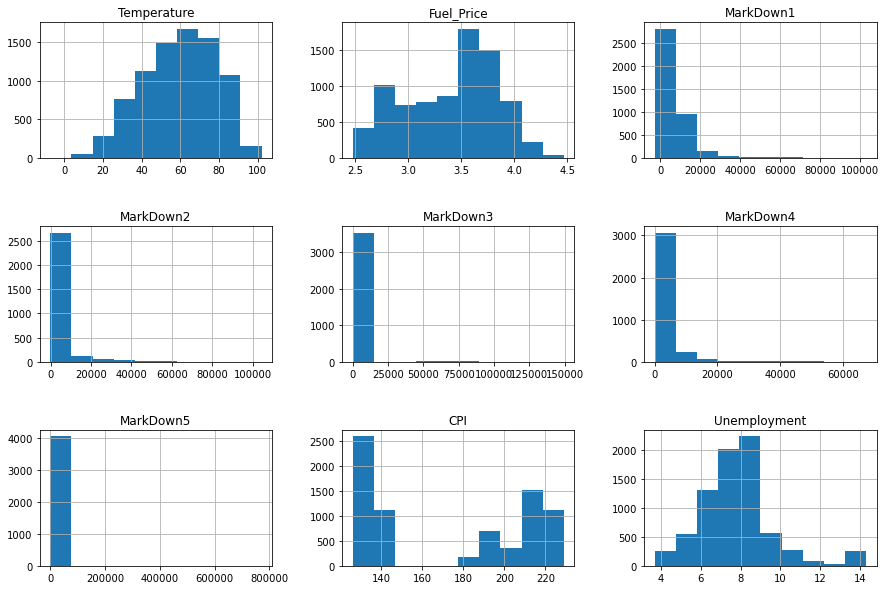

In [52]:
features_numerical.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

In [53]:
#markdown values  more than 10000 makes nonsense, find #of makedown values in the "outlier" range
features_out_range=features[(features['MarkDown1']>10000)|(features['MarkDown2']>100)|(features['MarkDown3']>10000)|(features['MarkDown4']>10000)|(features['MarkDown5']>10000)]
features_out_range.shape[0]/features.shape[0]

0.3017094017094017

In [54]:
#markdown values less than 0
features_neg=features[(features['MarkDown1']<0)|(features['MarkDown2']<0)|(features['MarkDown3']<0)|(features['MarkDown5']<0)]
features_neg.shape[0]/features.shape[0]

0.005372405372405372

In [55]:
#ratio of obs which contains markdown values in the outlier range
(features_out_range.shape[0]+features_neg.shape[0])/features.shape[0]

0.3070818070818071

Most of the numerical features in features dataframe show normal range except markdown values

Abnormal markdown(>100% or <0%) values are observed, markdown>100% is ~30.2%, markdown<0% is 0.5%

#### 2.5.6.2 Numerical Variables in weekly_sales_type df<a id='2.5.6.2_Numerical_Variables_in_weekly_sales_type_df></a>

In [56]:
Weekly_sales_type.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.00,11.00,22.00,33.0000,45.00
Dept,421570.0,44.260317,30.492054,1.00,18.00,37.00,74.0000,99.00
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.94,2079.65,7612.03,20205.8525,693099.36
Size,421570.0,136727.915739,60980.583328,34875.00,93638.00,140167.00,202505.0000,219622.00


In [57]:
#Notice the weekly_sales has negative values
Weekly_sales_out_range=Weekly_sales_type[Weekly_sales_type.Weekly_Sales<0]

In [58]:
#find out_range weekly_sales
Weekly_sales_out_range.shape[0]

1285

In [59]:
#find ratio of out_range weekly_sales
Weekly_sales_out_range.shape[0]/Weekly_sales_type.shape[0]

0.0030481296107408022

(array([ 73341.,      0.,   9443.,   9762.,      0.,      0.,  19319.,
          9528.,  19755.,  58267.,   9804.,   9582.,  20098.,  30136.,
             0.,      0.,   9878.,  20128., 112055.,  10474.]),
 array([ 34875.  ,  44112.35,  53349.7 ,  62587.05,  71824.4 ,  81061.75,
         90299.1 ,  99536.45, 108773.8 , 118011.15, 127248.5 , 136485.85,
        145723.2 , 154960.55, 164197.9 , 173435.25, 182672.6 , 191909.95,
        201147.3 , 210384.65, 219622.  ]),
 <BarContainer object of 20 artists>)

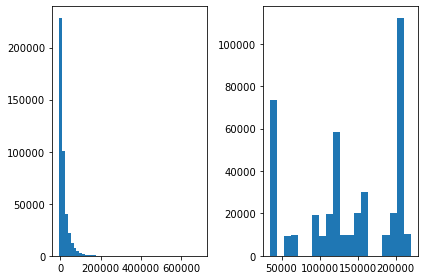

In [60]:
fig, axs = plt.subplots(1, 2, tight_layout=True)
axs[0].hist(Weekly_sales_type.Weekly_Sales, bins=50)
axs[1].hist(Weekly_sales_type.Size, bins=20)

Store size does not show abnormal values

About 0.3% weekly sales are negative.

## 2.6 Merge The Data<a id='2.6_Merge_The_Data'></a>

In [61]:
features.head()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
Date,,,,,,,,,,,
2010-02-05,1,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2010-02-12,1,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2010-02-19,1,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
2010-02-26,1,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
2010-03-05,1,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [62]:
df=features.reset_index().merge(Weekly_sales_type, how="right", on=['Store','Date'])
df.head()

,Date,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Dept,Weekly_Sales,IsHoliday_y,Type,Size
0,2010-02-05,1,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50,False,A,151315
1,2010-02-12,1,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,1,46039.49,True,A,151315
2,2010-02-19,1,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,1,41595.55,False,A,151315
3,2010-02-26,1,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,1,19403.54,False,A,151315
4,2010-03-05,1,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,1,21827.90,False,A,151315


In [63]:
df.shape

(421570, 17)

In [64]:
#check if two holiday cols are same
df['IsHoliday_x'].equals(df['IsHoliday_y'])

True

In [65]:
#remove duplicated column of holiday
df.drop(columns='IsHoliday_y',inplace=True)
df.rename(columns={'IsHoliday_x':'Holiday'},inplace=True)

## 2.7 Save The Data<a id='2.7_Save_The_Data'></a>

In [66]:
#save the data into csv file
df.to_csv(r'C:/New folder/capstone 2/data/df_clean.csv', index=False)

In [67]:
#save the data into single pickle file for next step
df.to_pickle('df_clean.pkl')

## 2.8 Summary<a id='2.8_Summary'></a>

1. Datasets Overview

    1) there are three datasets: features contains local information(CPI, unemployment, T and markdown values) change in time          series, type contains store size and type. weekly sales contains weekly sales for each store and dept.

    2) no duplicates found in all the datasets

    3) no missing values found in dataset weekly sales and type;missing values found in dataset "features"

2. Time series Dimensions   

    1) total number of stores are 45, total depts are 81, each of the store have about 60-80 depts, total number of time series        are 3331. store 30,33, 36-38, 42-44 have less depts(~60) than the rest. majority stores have 72-80 depts. least popular          dept are 65, 43 and 39 
    
    2) range of datetime for Weekly_sales is from Feb.05,2010 to Oct. 26,2012, time range for features is from Feb.05,2010 to          Jul. 26,2013. We ll select time range based Weekly_sales.

3. Categorical feature
    1) half of the stores are type A and have largest size in average, type C has smallest size in average and least number of          stores; Type A tends to have highest average weekly sales value
 
    2) Comparing holidays and nonholidays for weekly sales, the median values overall are similar, max /min sales values are            higher on holidays than that on non-holidays; when looking at each store, the holiday weekly sales is alway lightly              higher than non-holidays
    
    3) In terms of time trend of weekly_sales for each department, most dept seem to follow its own seasonality trend on weekly        sales. Some show high sales at holiday seasons(Nov, Dec), some show high sales at other seasons(July).For some depts,            weekly sales at different stores are comparable; for other depts, sales at different store vary significantly. Very few          depts have large time gap in the weekly sales records, and the trend is not clear
  
    4)80% of Store/Dept does not have full sales records during 143 weeks. 2.5% of the Store/Dept has records less than 4 weeks
    
  
4. numerical features

    1) for numerical features, missing values in markdown of feature dataset are about 50% above, missing values in CPI and            unemployment is about 7%, cannot replaced with median value

    2) abnormal markdown(>100% or <0%) values are observed, about 30%, not sure what value to replace the value which is greater        than 100% 

    3) abnormal(negative) weekly sales are observed (about 1285 out of 421K, 0.3%)
